In [1]:
import matplotlib.font_manager as font_manager
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
import pandas as pd
import scipy
from tqdm import tqdm
from utils.data_loading import load_disruption_distance, load_papers
from utils.figure_plot import plot_histogram, plot_zoom_histogram

In [2]:
font_path = '../data/font/helvetica.ttf'
font_manager.fontManager.addfont(font_path)

prop = font_manager.FontProperties(family='Helvetica')

# Data Loading

#### Citation network

In [3]:
net = scipy.sparse.load_npz("/data/sg/munjkim/APS/original/citation_net.npz")

In [4]:
citations = np.array(net.sum(axis=0))[0]
references = np.array(net.sum(axis=1)).reshape((1,-1))[0]

#### Paper Information

In [5]:
papers_df = load_papers('/data/sg/munjkim/APS/paper_table.csv')
papers_df.head()

,paper_id,doi,year,date,journal_code,title,PACS1,PACS2,PACS3,PACS4,PACS5,category
0,0,10.1103/PhysRev.1.124,1913.0,1913-02-01,PR,An Absolute Determination of the Viscosity of Air,NaN,NaN,NaN,NaN,NaN,NaN
1,1,10.1103/PhysRev.1.16,1913.0,1913-01-01,PR,The Velocity of Electrons in the Photo-electri...,NaN,NaN,NaN,NaN,NaN,NaN
2,2,10.1103/PhysRev.1.218,1913.0,1913-03-01,PR,Brownian Movements in Gases at Low Pressures,NaN,NaN,NaN,NaN,NaN,NaN
3,3,10.1103/PhysRev.1.237,1913.0,1913-03-01,PR,Proceedings of the American Physical Society,NaN,NaN,NaN,NaN,NaN,NaN
4,4,10.1103/PhysRev.1.259,1913.0,1913-04-01,PR,The Annealing of Steel in an Alternating Magne...,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:

print("The number of papers of the original dataset is", len(papers_df))

print("Published between ", min(papers_df['year']), "and", max(papers_df['year']) )

The number of papers of the original dataset is 644022
Published between  1893.0 and 2019.0


In [7]:
papers_df['citations'] = papers_df['paper_id'].apply(lambda x: citations[x])
papers_df['references'] = papers_df['paper_id'].apply(lambda x: references[x])

# removing the papers published after 2017
papers_df = papers_df[papers_df['year']<2017]

In [8]:
# removing the papers having less than 5 citations and 1 reference
papers_df = papers_df[papers_df['citations']>4]
papers_df = papers_df[papers_df['references']>0]

In [9]:

print("The number of papers is", len(papers_df))
print("Published between ", min(papers_df['year']), "and", max(papers_df['year']) )

The number of papers is 327021
Published between  1914.0 and 2016.0


# Loading EDM and Disruption

In [10]:
NETWORKS_NAME = ['original','random/random0',]
MEASURE = ['disruption','disruption_5_nok','disruption_5',

           '100_5_q_1_ep_1_bs_1024_embedding/distance',
          ]
for net in NETWORKS_NAME:
    for m in MEASURE:
        papers_df = load_disruption_distance(papers_df,net,m,data='aps')

no such directory: /data/sg/munjkim/APS/random/random0/disruption_5_nok.npy


## Plotting distribution

<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_206284/1225369362.py:2: SyntaxWarning: invalid escape sequence '\D'
  bins=100, color='#2A66FF', alpha=1, figsize=(6, 5), xlabel='$\Delta$',


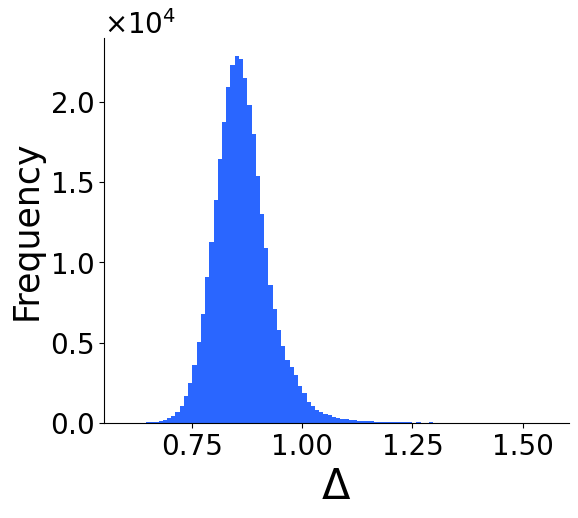

In [11]:
plot_histogram(papers_df, 'original_100_5_q_1_ep_1_bs_1024_embedding_distance',
               bins=100, color='#2A66FF', alpha=1, figsize=(6, 5), xlabel='$\Delta$',
               output_path = '../results/Figures/Figure3a_APS_Distribution_EDM.png')

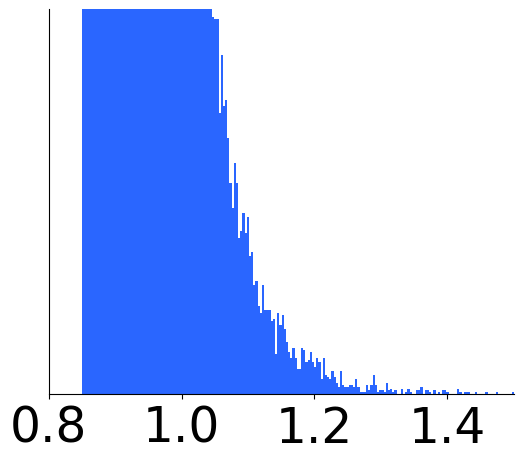

In [12]:
bins = np.linspace(0.85,1.5,200)
plot_zoom_histogram( dataframe=papers_df,
    column_name='original_100_5_q_1_ep_1_bs_1024_embedding_distance',
    bins=bins,
    color='#2A66FF',
    alpha=1,
    xticks=[0.8, 1.0, 1.2, 1.4, 1.6],
    xlim=(0.8, 1.5),
    ylim=(0, 200),
    output_path = '../results/Figures/Figure3a_APS_Distribution_EDM_zoom.png')


# D

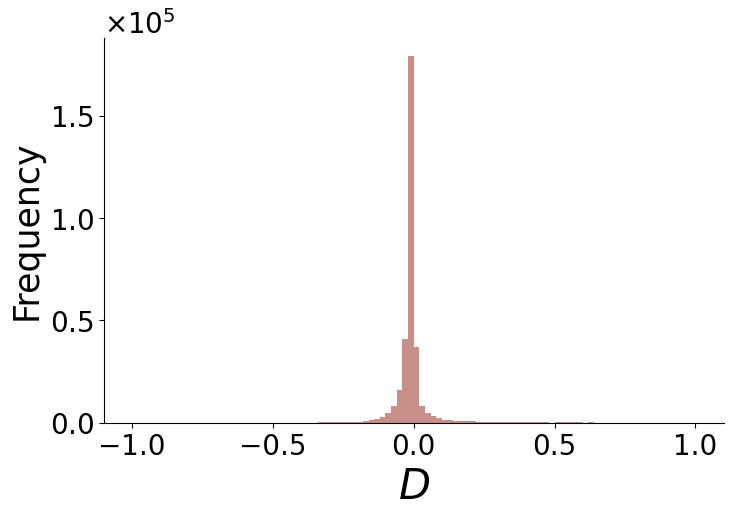

In [13]:
plot_histogram(papers_df, 'original_disruption',
               bins=100, color='#AE6156', alpha=0.7, figsize=(8, 5), xlabel='$D$',
               output_path = '../results/Figures/Figure3a_APS_Distribution_D.png')

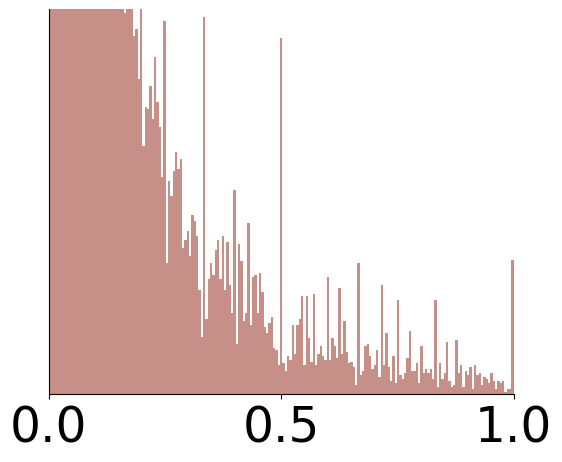

In [14]:
bins = np.linspace(0, 1, 200)

plot_zoom_histogram( dataframe=papers_df,
    column_name='original_disruption',
    bins=bins,
    color='#AE6156',
    alpha=0.7,
    xticks=[0.0,0.5,1],
    xlim=(0, 1),
    ylim=(0, 200),
    output_path = '../results/Figures/Figure3a_APS_Distribution_D_zoom.png')


# D_{nok}

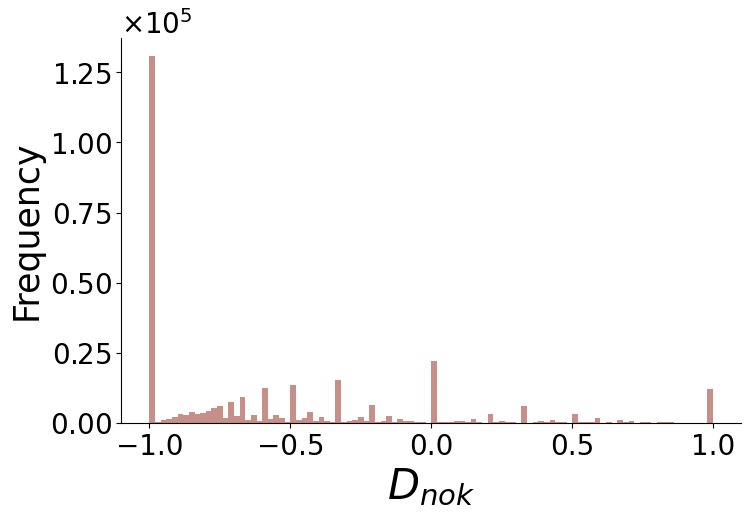

In [15]:
plot_histogram(papers_df, 'original_disruption_5_nok',
               bins=100, color='#AE6156', alpha=0.7, figsize=(8, 5), xlabel='$D_{nok}$',
               output_path = '../results/Figures/Supplementary_Information/SI_Figure1_APS_Distribution_D_nok.png')

# D_{5}

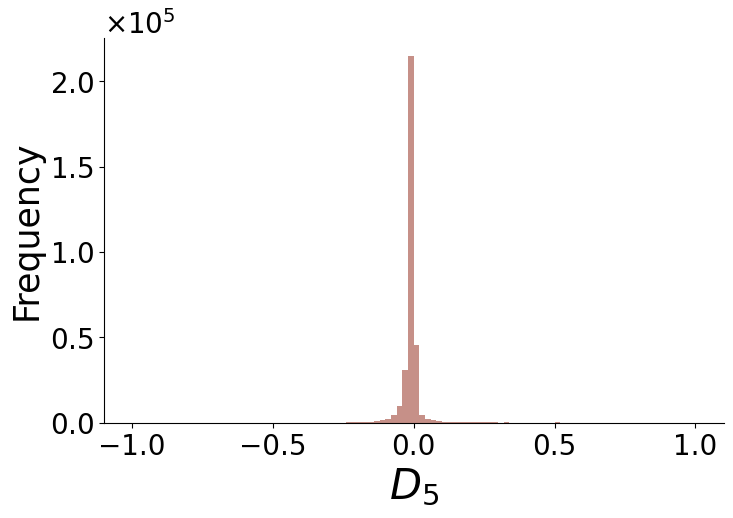

In [16]:
plot_histogram(papers_df, 'original_disruption_5',
               bins=100, color='#AE6156', alpha=0.7, figsize=(8, 5), xlabel='$D_{5}$',
               output_path = '../results/Figures/Supplementary_Information/SI_Figure1_APS_Distribution_D_5.png')

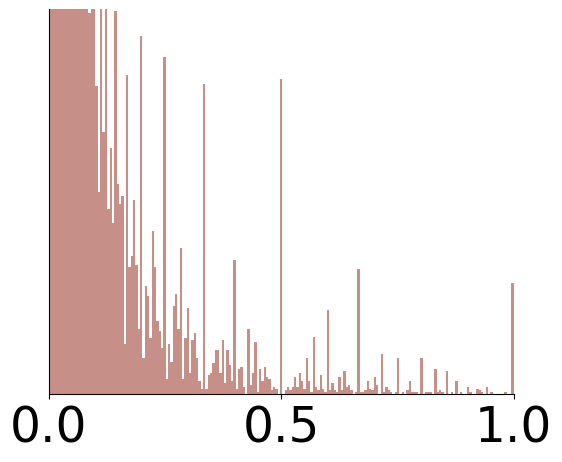

In [17]:
bins = np.linspace(0, 1, 200)

plot_zoom_histogram( dataframe=papers_df,
    column_name='original_disruption_5',
    bins=bins,
    color='#AE6156',
    alpha=0.7,
    xticks=[0.0,0.5,1],
    xlim=(0, 1),
    ylim=(0, 200),
    output_path = '../results/Figures/Supplementary_Information/SI_Figure1_APS_Distribution_D_5_zoom.png')
